In [45]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("D:\\Projects\Project - TG NPDCL\\final_sorted_output.csv")
print("Uploaded")

Uploaded


<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\thera\AppData\Local\Temp\ipykernel_16404\47374011.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("D:\\Projects\Project - TG NPDCL\\final_sorted_output.csv")


In [47]:
df.describe()

,CatCode,TotServices,BilledServices,Units,Load
count,435.0,435.000000,435.000000,435.000000,435.000000
mean,9.0,1.045977,1.036782,452.873563,34.100000
std,0.0,0.209676,0.232257,571.869269,12.185008
min,9.0,1.000000,0.000000,0.000000,1.500000
25%,9.0,1.000000,1.000000,108.000000,30.000000
50%,9.0,1.000000,1.000000,274.000000,30.000000
75%,9.0,1.000000,1.000000,619.500000,30.000000
max,9.0,2.000000,2.000000,7058.000000,80.000000


In [48]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
430    False
431    False
432    False
433    False
434    False
Length: 435, dtype: bool

In [49]:
# Convert 'Month' column to datetime
df["Month"] = pd.to_datetime(df["Month"], format="%b-%y").dt.to_period("M")


# Check dataset structure
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   Circle          435 non-null    object   
 1   Division        435 non-null    object   
 2   SubDivision     435 non-null    object   
 3   Section         435 non-null    object   
 4   Area            435 non-null    object   
 5   CatCode         435 non-null    int64    
 6   CatDesc         435 non-null    object   
 7   TotServices     435 non-null    int64    
 8   BilledServices  435 non-null    int64    
 9   Units           435 non-null    int64    
 10  Load            435 non-null    float64  
 11  Month           435 non-null    period[M]
dtypes: float64(1), int64(4), object(6), period[M](1)
memory usage: 40.9+ KB
None
        Circle          Division SubDivision      Section       Area  CatCode  \
0  HANUMAKONDA  HANAMKONDA/RURAL      PARKAL       DAMERA    OGLAPUR      

1. Monthly Electricity Consumption Trend 

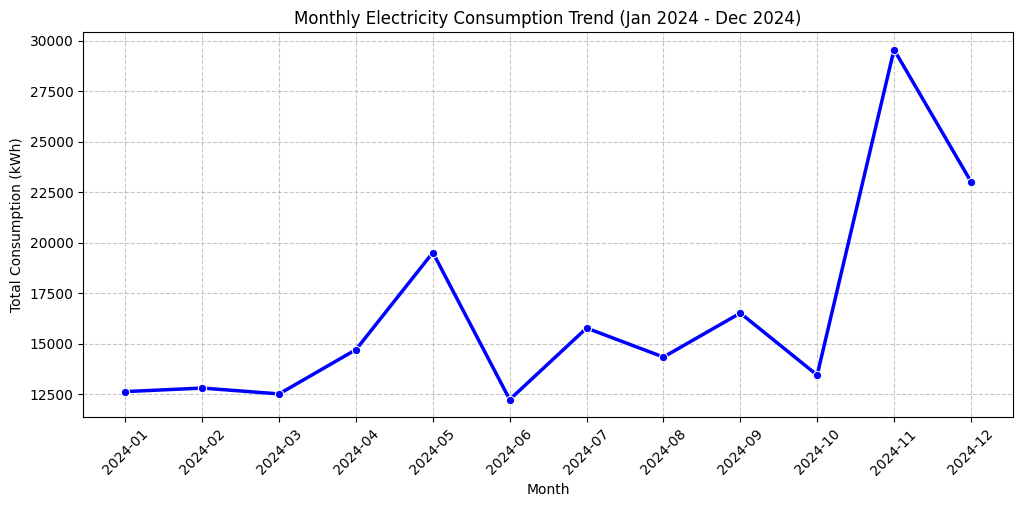

In [50]:
# Aggregate total electricity consumption per month
monthly_trend = df.groupby("Month")["Units"].sum()

# Plot trend
plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_trend.index.astype(str), y=monthly_trend.values, marker="o", linewidth=2.5, color="b")
plt.xticks(rotation=45)
plt.title("Monthly Electricity Consumption Trend (Jan 2024 - Dec 2024)")
plt.ylabel("Total Consumption (kWh)")
plt.xlabel("Month")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


2. Top 10 Circles by Electricity Consumption in TG

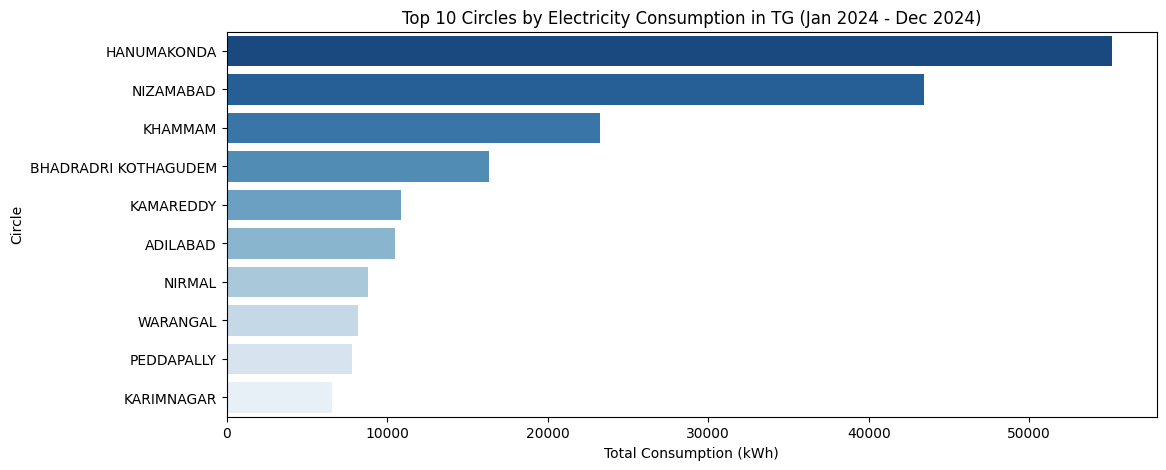

In [51]:
# Aggregate total consumption per Circle
top_circles = df.groupby("Circle")["Units"].sum().sort_values(ascending=False).head(10)

# Plot top 10 Circles
plt.figure(figsize=(12, 5))
sns.barplot(y=top_circles.index, x=top_circles.values, hue=top_circles.index, palette="Blues_r")
plt.title("Top 10 Circles by Electricity Consumption in TG (Jan 2024 - Dec 2024)")
plt.xlabel("Total Consumption (kWh)")
plt.ylabel("Circle")
plt.show()


3. Identify the bottom 5 Circles based on EV consumption (Units)

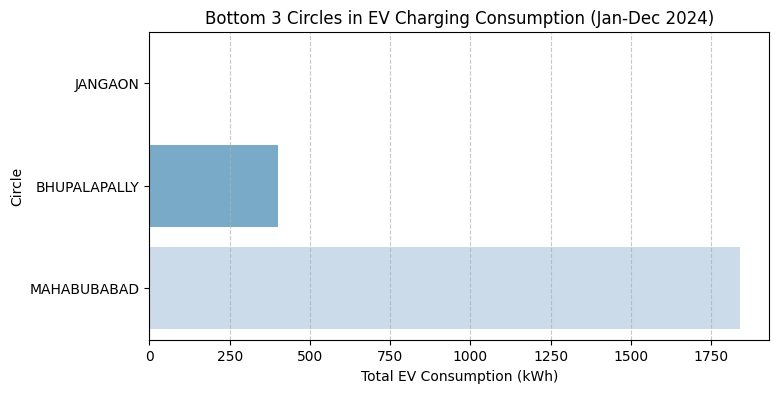

         Circle  Units
0       JANGAON      0
1  BHUPALAPALLY    401
2   MAHABUBABAD   1840


In [52]:
least_ev_circles = df.groupby("Circle")["Units"].sum().nsmallest(3).reset_index()

# Plot the bottom 5 Circles
plt.figure(figsize=(8, 4))
sns.barplot(data=least_ev_circles, x="Units", y="Circle", hue="Circle", palette="Blues_r", legend=False)
plt.xlabel("Total EV Consumption (kWh)")
plt.ylabel("Circle")
plt.title("Bottom 3 Circles in EV Charging Consumption (Jan-Dec 2024)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Display the bottom 5 Circles
print(least_ev_circles)


4. Billed vs. Unbilled Services

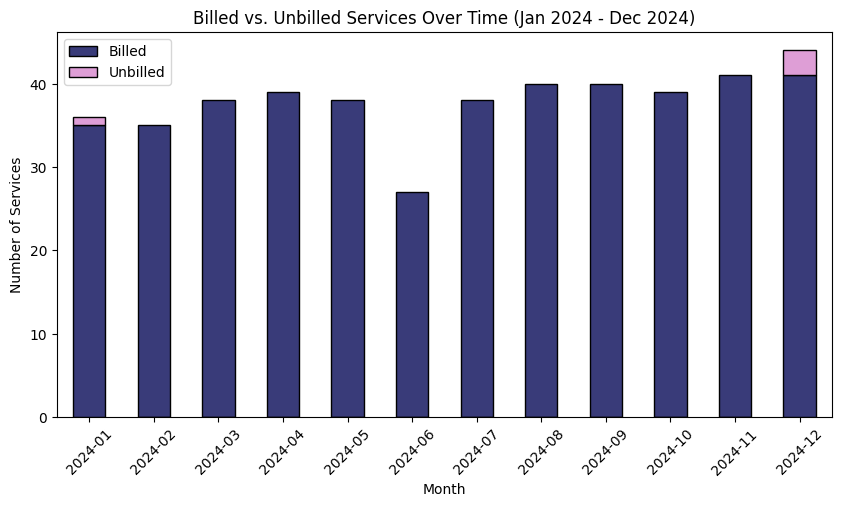

In [53]:
# Calculate unbilled services
df["UnbilledServices"] = df["TotServices"] - df["BilledServices"]

# Aggregate billed vs. unbilled services per month
billed_unbilled = df.groupby("Month")[["BilledServices", "UnbilledServices"]].sum()

# Plot stacked bar chart
billed_unbilled.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="tab20b", edgecolor="black")
plt.title("Billed vs. Unbilled Services Over Time (Jan 2024 - Dec 2024)")
plt.ylabel("Number of Services")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend(["Billed", "Unbilled"])
plt.show()


5. Scatter plot: Load vs. Electricity Consumption

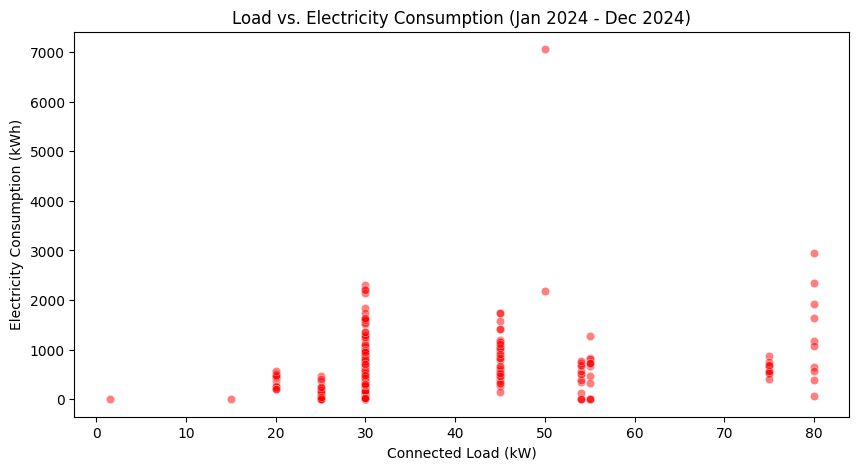

In [54]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Load"], y=df["Units"], alpha=0.5, color="red")
plt.title("Load vs. Electricity Consumption (Jan 2024 - Dec 2024)")
plt.xlabel("Connected Load (kW)")
plt.ylabel("Electricity Consumption (kWh)")
plt.show()


6. Electricity Consumption by Season

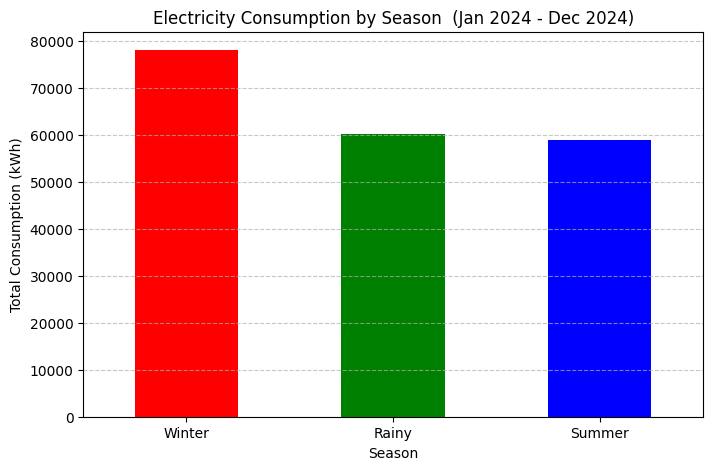

In [55]:
# Extract month and create a 'Season' column
df["Month_Num"] = df["Month"].dt.month
df["Season"] = df["Month_Num"].map({12: "Winter", 1: "Winter", 2: "Winter",
                                    3: "Summer", 4: "Summer", 5: "Summer",
                                    6: "Summer", 7: "Rainy", 8: "Rainy",
                                    9: "Rainy", 10: "Rainy", 11: "Winter"})

# Group by season and sum the consumption
seasonal_trend = df.groupby("Season")["Units"].sum()

# Plot seasonal trend
plt.figure(figsize=(8, 5))
seasonal_trend.sort_values(ascending=False).plot(kind="bar", color=["r", "g", "b", "orange"])
plt.title("Electricity Consumption by Season  (Jan 2024 - Dec 2024)")
plt.ylabel("Total Consumption (kWh)")
plt.xlabel("Season")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
